In [1]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

### Move to the directory where you have the data

In [57]:
## in the local
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')
shuffle_conditions = np.load('Shuffle_conditions.npy')
shuffle_conditions_d = np.load('Shuffle_conditions_d.npy')

os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

In [ ]:
## if I am in the cluster
os.chdir('/home/david/Desktop/IDIBAPS/Gottlib')

## Target Decoding
### Load data



In [58]:

cd_LIP_hm = np.load('cd_LIP_hm.npy')
cd_DLPFC_hm = np.load('cd_DLPFC_hm.npy')
cd_LIP = np.load('cd_LIP.npy')
cd_DLPFC = np.load('cd_DLPFC.npy')



#### Error of each neuron for each cross-decoding condition

In [4]:
print(np.shape(cd_LIP))
print('conditions, train, test, neuron_error')

(4, 22, 22, 44)
conditions, train, test, neuron_error


#### Each "square" has 44 or 63 values (1 per neuron). For the heatmap, I get the mean of all the neurons in each cross-decoding condition

In [5]:
print(np.shape(cd_LIP_hm))
print('conditions, train, test value (mean error of all the neurons)')

(4, 22, 22)
conditions, train, test value (mean error of all the neurons)


### Heatmaps

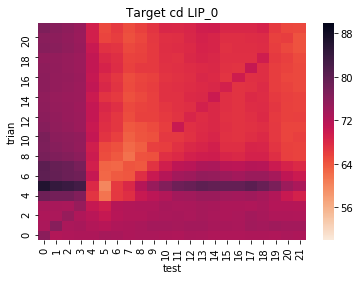

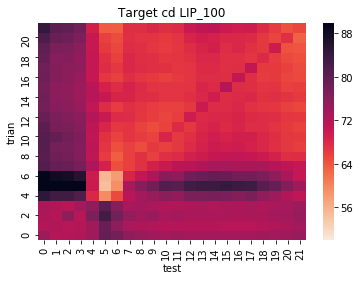

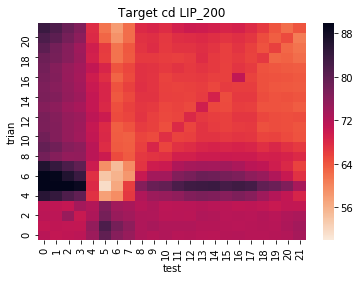

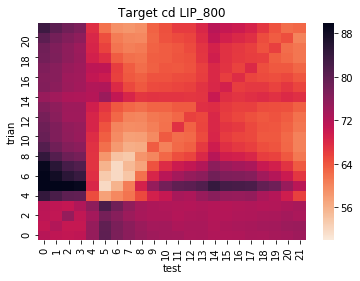

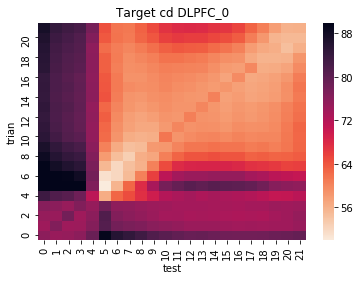

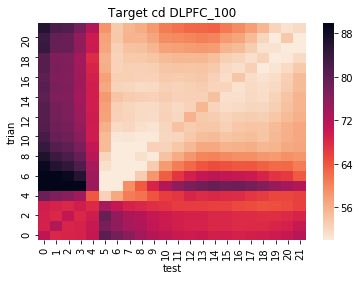

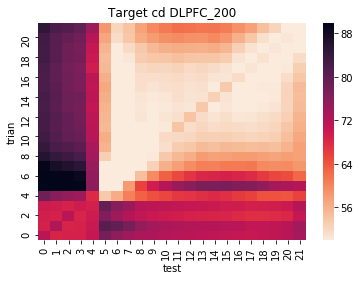

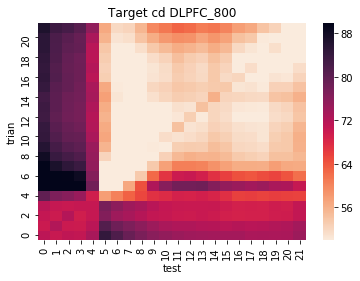

In [6]:

Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


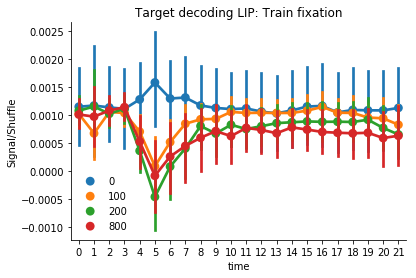

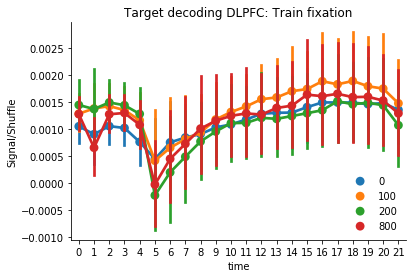

In [62]:
#### All times (training in fixation presentation, test on the rest)
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(1/cd_LIP[idx, 1, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP[idx,1, : ][i] - 1/shuffle_conditions[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()

    
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train fixation' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(1/cd_DLPFC[idx, 1, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC[idx,1, : ][i] - 1/shuffle_conditions[idx+4].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train fixation' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


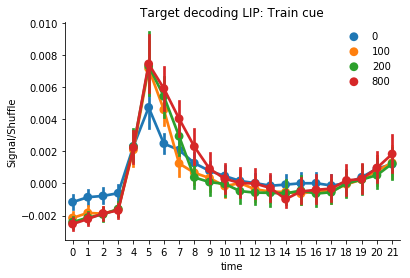

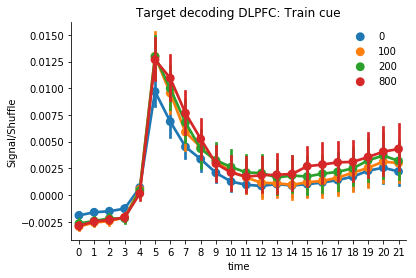

In [69]:
#### All times (training in distractor presentation, test on the rest)
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP[idx, 5, : ][i] - 1/shuffle_conditions[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train cue' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):    
    #n=pd.DataFrame(1/cd_DLPFC[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC[idx, 5, : ][i] - 1/shuffle_conditions[idx+4].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train cue' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


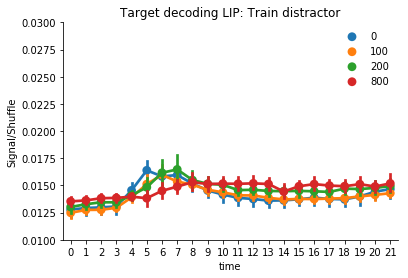

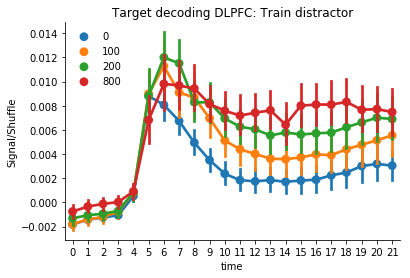

In [72]:
#### All times (training in distractor presentation, test on the rest)

distractor_times=[6,7,8,14]


frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    #n = pd.DataFrame(np.array([1/cd_LIP[idx, distractor_times[idx], : ][i] - 1/shuffle_conditions[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()

    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC[idx, distractor_times[idx], : ][i] - 1/shuffle_conditions[4+idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()

    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

## Decode distractor
### Load data

In [10]:
cd_LIP_d_hm = np.load('cd_LIP_d_hm.npy')
cd_DLPFC_d_hm = np.load('cd_DLPFC_d_hm.npy')
cd_LIP_d = np.load('cd_LIP_d.npy')
cd_DLPFC_d = np.load('cd_DLPFC_d.npy')

### Heatmaps

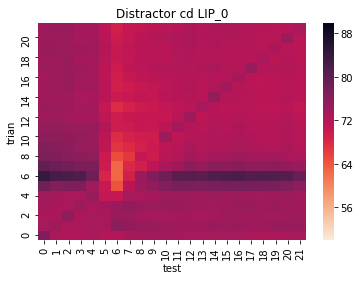

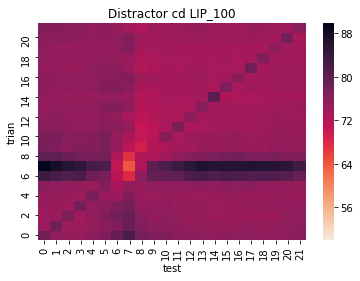

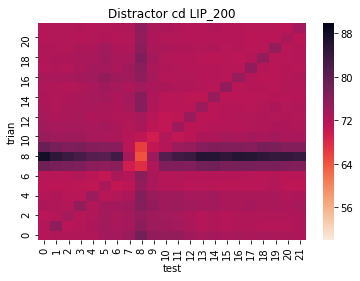

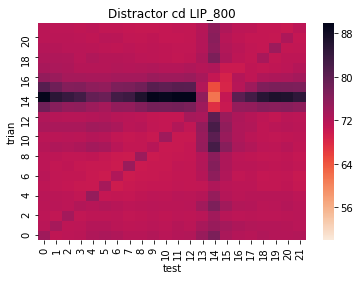

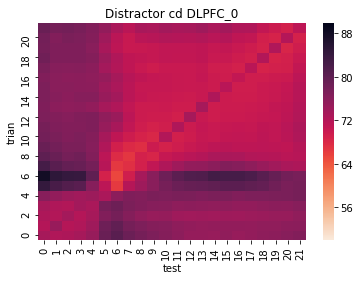

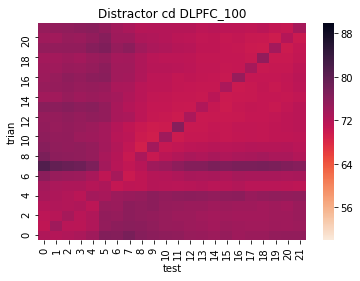

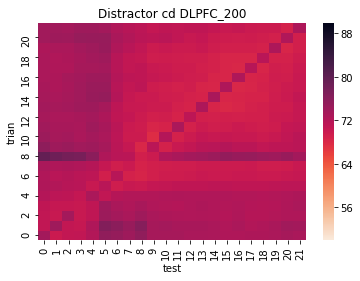

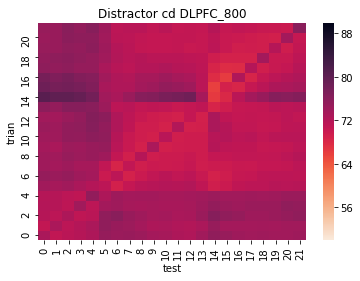

In [11]:
Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


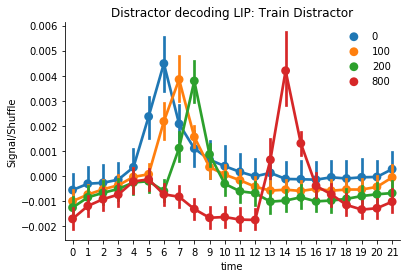

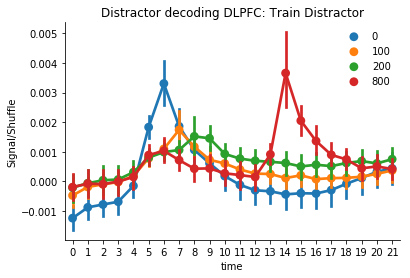

In [52]:
#### All times (training in distractor presentation, test on the rest)

distractor_times=[6,7,8,14]


frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP_d[idx, distractor_times[idx], : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP_d[idx, distractor_times[idx], : ][i] - 1/shuffle_conditions_d[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding LIP: Train Distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(1/cd_DLPFC_d[idx, distractor_times[idx], : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC_d[idx, distractor_times[idx], : ][i] - 1/shuffle_conditions_d[4+idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    #d = shuffle_conditions_d[4+idx]
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding DLPFC: Train Distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

In [13]:
### Decode Distractor in target presentation trianing in distractor

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


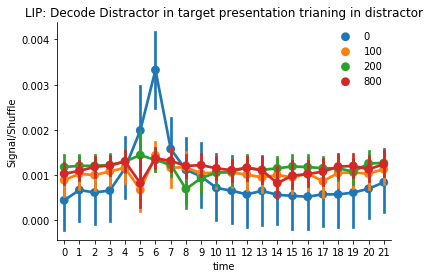

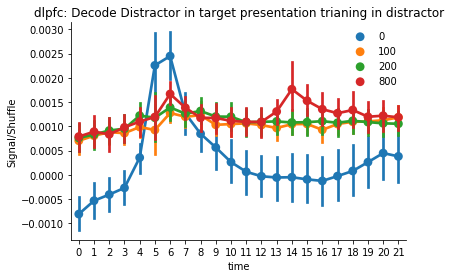

In [55]:

distractor_times=[6,7,8,14]


frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP_d[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP_d[idx, 5, : ][i] - 1/shuffle_conditions_d[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    ##    
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('LIP: Decode Distractor in target presentation trianing in distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_DLPFC_d[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC_d[idx, 5, : ][i] - 1/shuffle_conditions_d[4+idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('dlpfc: Decode Distractor in target presentation trianing in distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


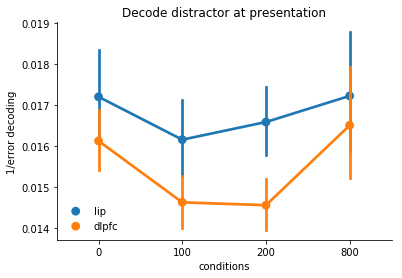

In [15]:
frames=[]

matrix_100_800 = pd.DataFrame({'0': 1/cd_LIP_d[0,6,6]})
matrix_100_800 ['100'] =  1/cd_LIP_d[1,7,7]
matrix_100_800 ['200'] =  1/cd_LIP_d[2,8,8]
matrix_100_800 ['800'] =  1/cd_LIP_d[3,14,14]
matrix_100_800['neuro']=range(0,len(matrix_100_800))
LIP_L =matrix_100_800.melt('neuro')
LIP_L.columns=['neuro', 'cond', 'value']
LIP_L['area']='lip'
frames.append(LIP_L)


matrix_100_800 = pd.DataFrame({'0': 1/cd_DLPFC_d[0,6,6]})
matrix_100_800 ['100'] =  1/cd_DLPFC_d[1,7,7]
matrix_100_800 ['200'] =  1/cd_DLPFC_d[2,8,8]
matrix_100_800 ['800'] =  1/cd_DLPFC_d[3,14,14]
matrix_100_800['neuro']=range(0,len(matrix_100_800))
dlpfc_L =matrix_100_800.melt('neuro')
dlpfc_L.columns=['neuro', 'cond', 'value']
dlpfc_L['area']='dlpfc'
frames.append(dlpfc_L)

fr = pd.concat(frames)
fr

sns.pointplot(x='cond', y='value', hue='area', ci=95, x_estimator=np.mean, data=fr)
plt.legend(frameon=False)
plt.title('Decode distractor at presentation')
plt.xlabel('conditions')
plt.ylabel('1/error decoding')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

#matrix_100_800 = matrix_100_800.melt('neuro')
#matrix_100_800.columns=['neuro', 'cond', 'value']

#sns.boxplot('neuro', 'value', hue='cond', data=matrix_100_800)
#sns.stripplot(y='value', x='neuro', data=blue)

# cat_100 = matrix_100_800['100']>matrix_100_800['100'].median()
# cat_800 = matrix_100_800['800']<matrix_100_800['800'].median()

# cat_m = pd.DataFrame({'100': cat_100, '800': cat_800 })
# cat_m['neuro']=range(0,len(cat_m))
# cat_m



In [33]:
fr

,neuro,cond,value,area
0,0,0,0.016210,lip
1,1,0,0.012422,lip
2,2,0,0.012482,lip
3,3,0,0.021017,lip
4,4,0,0.016334,lip
5,5,0,0.014879,lip
6,6,0,0.013411,lip
7,7,0,0.016827,lip
8,8,0,0.013936,lip
9,9,0,0.024675,lip


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


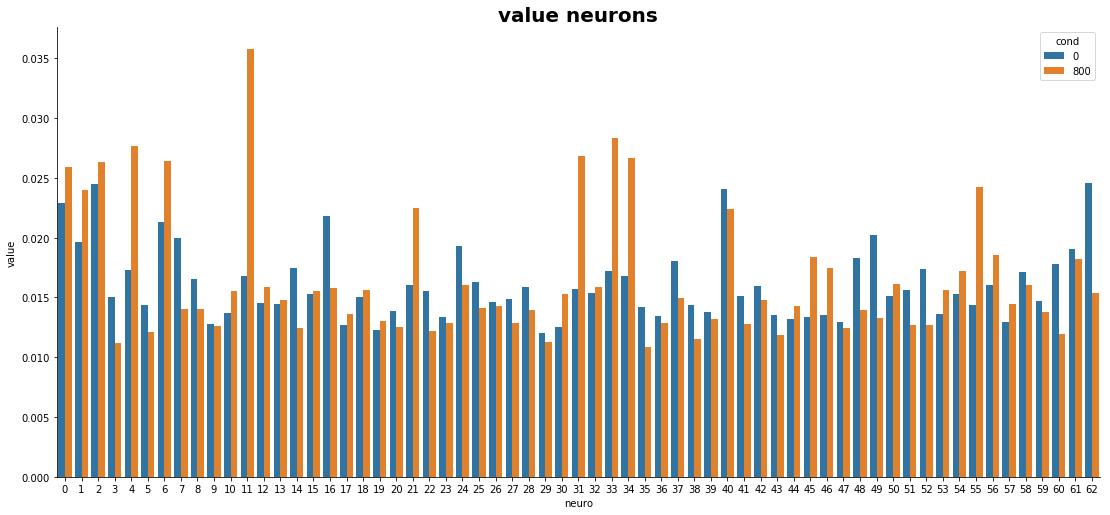

In [27]:
L =matrix_100_800.melt('neuro')
L.columns=['neuro', 'cond', 'value']
#matrix_100_800
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
g = sns.factorplot('neuro', 'value', 'cond', L, kind='bar', ax=ax)
ax.set_title('value neurons', fontsize=20, weight='demibold')
sns.despine(ax =ax)
plt.close()


AttributeError: Unknown property size

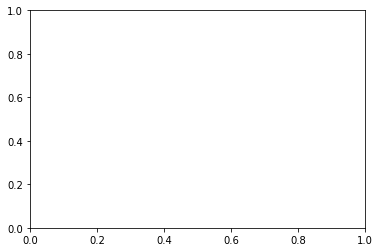

In [26]:
L['log_value'] = -np.log(L['value'])
sns.barplot(x='neuro', y='log_value', hue='cond', data=L, size=20)
plt.ylim(3,5)